# Исследование поездок сервиса аренды самокатов

**Описание проекта:**   
В современном мире самокаты стали неотъемлемой частью жизни каждого крупного города. Много различных компаний предлагают гражданам воспользоваться их услугами и взять самокат в аренду для удобного и быстрого перемещения по городу. Благодаря компании GoFast мы сможем посмотреть и проанализировать основные тенденции поездок и параметры клиентов. Сравним основные характеристики клиентов с подпиской и без.

**Цель исследования:**  
Проанализировать данные пользователей и их поездок на самокате. Проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание данных:**   
3 датасета, в которых есть информация о пользователях, их поездках и подписках.

**Ход исследования:**
- [1. Загрузка данных](#загрузка)
- [2. Предобработка данных](#предобработка)
- [3. Исследовательский анализ данных](#исслед)
- [4. Объединение данных](#объед)
- [5. Подсчёт выручки](#выручка)
- [6. Проверка гипотез](#гипотезы)
- [7. Вывод](#вывод)
    
**Общий вывод:**  
Был проведен исследовательский анализ данных по частоте встречаемости городов: на первом месте Пятигорск, на последнем Москва. Но разница между 8 городами, где пользуются самокатами GoFast не существенная. Соотношение пользователей без подписки и с подпиской - 54% на 46% соответственно. В среднем возраст пользователей около 25 лет. Расстояние, которое пользователь преодолел за одну поездку: в среднем примерно 3100 метров. Продолжительность поездок: в среднем это 18 минут. Средняя дистанция у клиентов с подпиской чуть больше, чем у клиентов без подписки (среднее 3115 против 3045 метров). Среднее время пользования самокатом у клиентов с подпиской тоже выше, чем у клиентов без подписки (18.54 против 17.39)  

Проверили 3 гипотезы:  
1) Тратят ли пользователи с подпиской больше времени на поездки? Есть статистические основания утверждать, что длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки
2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Нет статистических оснований утверждать, что среднее расстояние одной поездки больше 3130 м
3) Является ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Можем утверждать, что в результате проведенного теста помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


<a id="загрузка"></a>
## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users.duplicated().sum()

31

В данном датафрейме представлены данные по клиентам сервиса аренды самокатов. Пропусков нет, есть дубликаты. Избавимся от них и перезапишем датафрейм

In [5]:
users = users.drop_duplicates()
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
rides.duplicated().sum()

0

В данных по поездкам нет пропусков и дубликатов. Нужно изменить формат столбца date

In [9]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В данных по подпискам всего две строки с условиями подписки

**Вывод по разделу:**  
В данном блоке мы загрузили 3 файла с данными, относящихся к популярному сервису аренды самокатов GoFast.
- Первый файл содержит данные по пользователям. 5 столбцов, 1565 строк. 31 дубликат (удалено). Пропусков нет. С типами данными всё в порядке. Название колонок грамотные
- Во втором их поездки на самокате. 4 столбца, 18068 строк. Дубликатов нет, пропусков тоже. Тип данных у date - object, необходимо перевести в datetime. Название колонок подходящие
- В третьем данные по подписке. Файл всего с 2 строками и 4 столбцами, Дубликатов, пропусков нет, тип данных правильные

<a id="предобработка"></a>
## Предобработка данных

Переведем столбец date в формат datetime. И создадим столбец с номером месяца на основе столбца date

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Вывод по разделу:**
1) перевели столбец date из типа данных object в datetime64
2) создали новый столбец с номером месяца на основе столбца date


<a id="исслед"></a>
## Исследовательский анализ данных

In [12]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

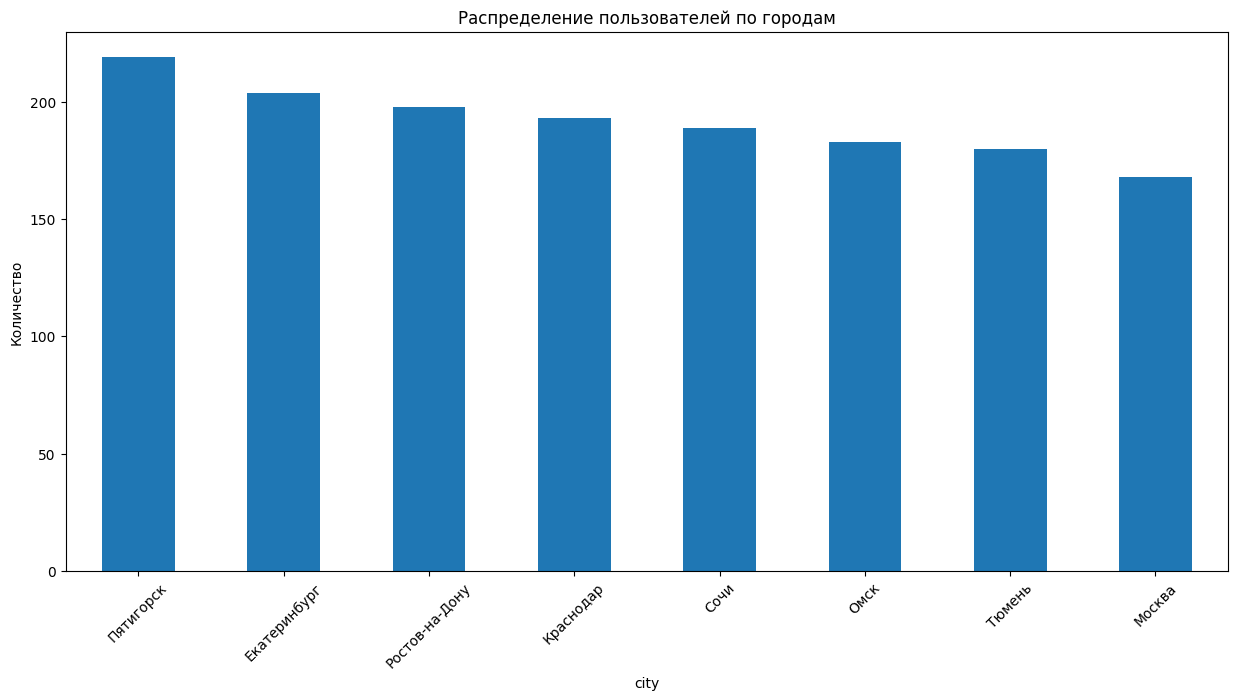

In [13]:
users['city'].value_counts().plot(kind = 'bar', figsize =(15,7))
plt.title('Распределение пользователей по городам')
plt.ylabel('Количество')
plt.xticks(rotation=45);

Большинство клиентов сервиса аренды самокатов GoFast из города Пятигорск. Меньше всего в Москве. Но разница между городами не существенная, можно сказать, что в каждом городе их примерно одинаково
</div>


In [14]:
ratio_users = (users['subscription_type'].value_counts() / users['subscription_type'].count()).round(2)
ratio_users = ratio_users.rename({'free': 'Без подписки','ultra': 'C подпиской'})
ratio_users

subscription_type
Без подписки    0.54
C подпиской     0.46
Name: count, dtype: float64

Соотношение пользователей: 54% без подписки, 46% с подпиской

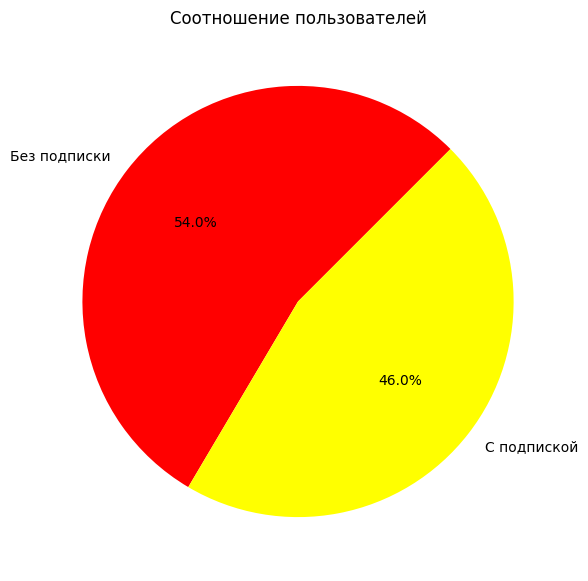

In [15]:
ratio_users.plot.pie(figsize=(15,7),autopct='%1.1f%%', startangle=45, colors = ['red', 'yellow'])
plt.ylabel('')
plt.title('Соотношение пользователей');

Пользователей сервиса без подписки чуть больше, чем пользователей с подпиской

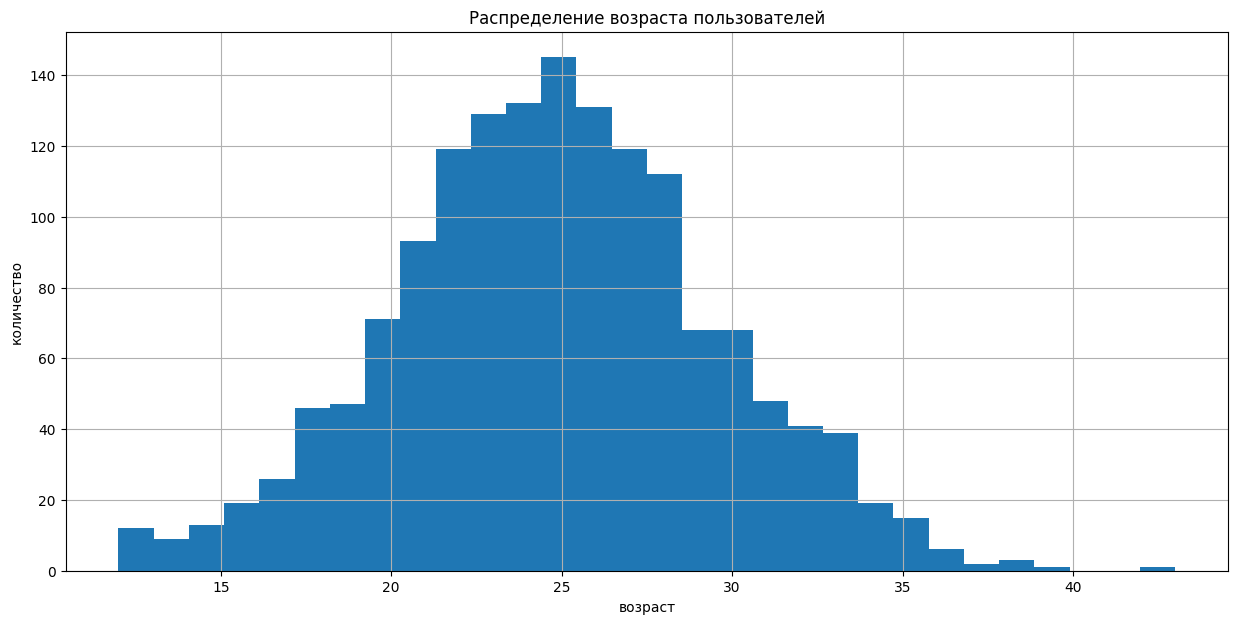

In [16]:
users['age'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение возраста пользователей')
plt.xlabel('возраст')
plt.ylabel('количество');

In [17]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

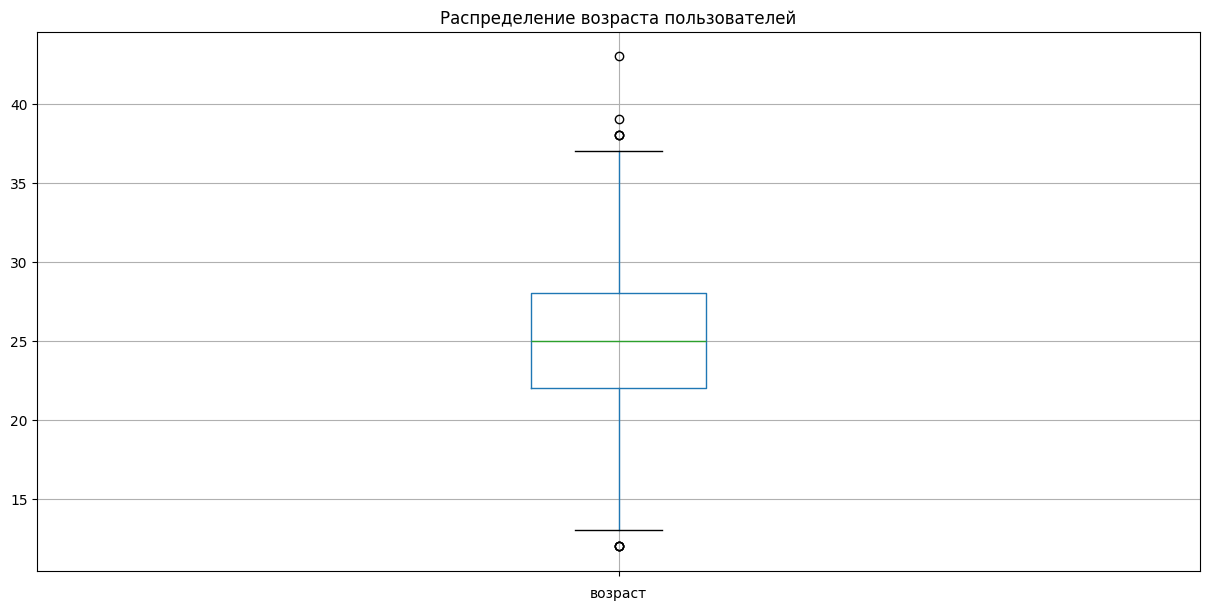

In [18]:
users.boxplot(column = 'age', figsize =(15,7) )
plt.title('Распределение возраста пользователей')
plt.xlabel('возраст')
plt.xticks([1], ['']);

Построим гистограмму для понимания соотношения возраста пользователей. В основном это пользователи от 20 до 30 лет. Со средним примерно около 25

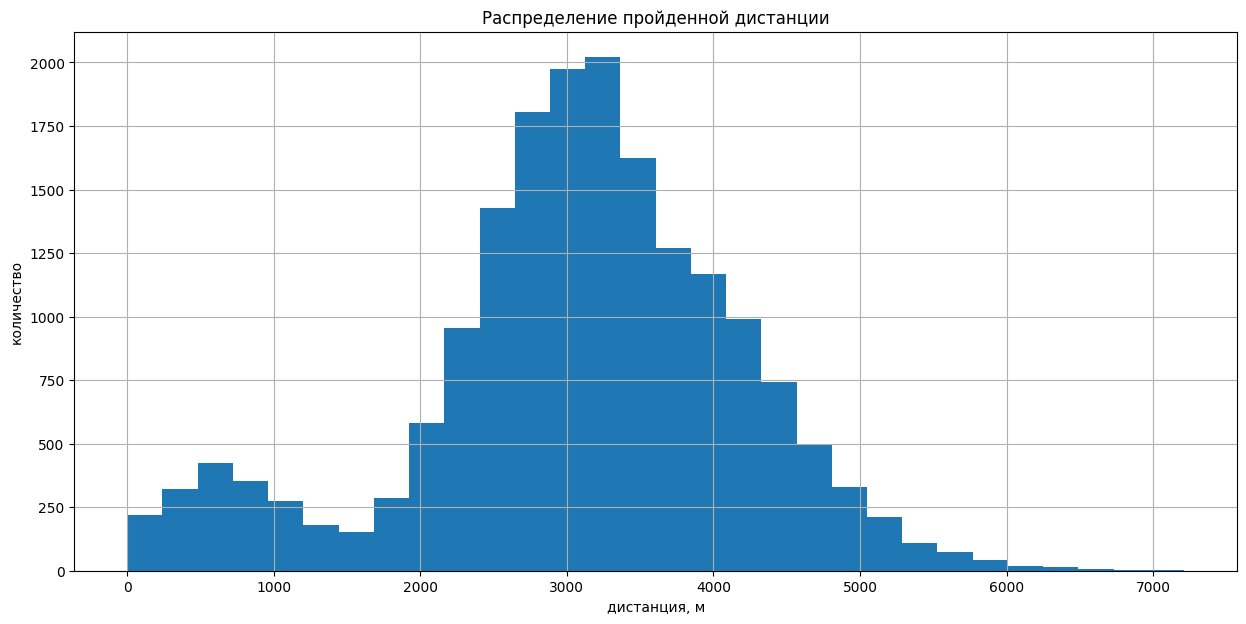

In [19]:
rides['distance'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение пройденной дистанции')
plt.xlabel('дистанция, м')
plt.ylabel('количество');

In [20]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

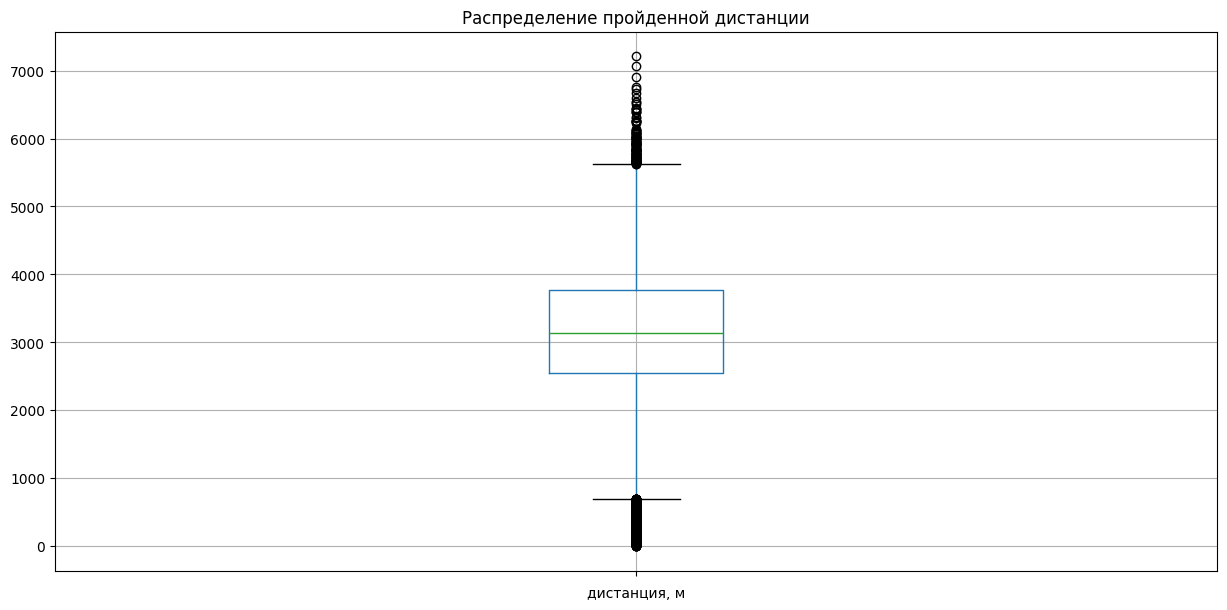

In [21]:
rides.boxplot(column = 'distance', figsize =(15,7) )
plt.title('Распределение пройденной дистанции')
plt.xlabel('дистанция, м');
plt.xticks([1], ['']);

Мы видим, что в основном пользователи либо проезжают расстояние до 1 километра. Либо же проезжают от 2500 до 3800 км. Мало кто ездит на расстояние 1-2км. В среднем же это около 3100 метров

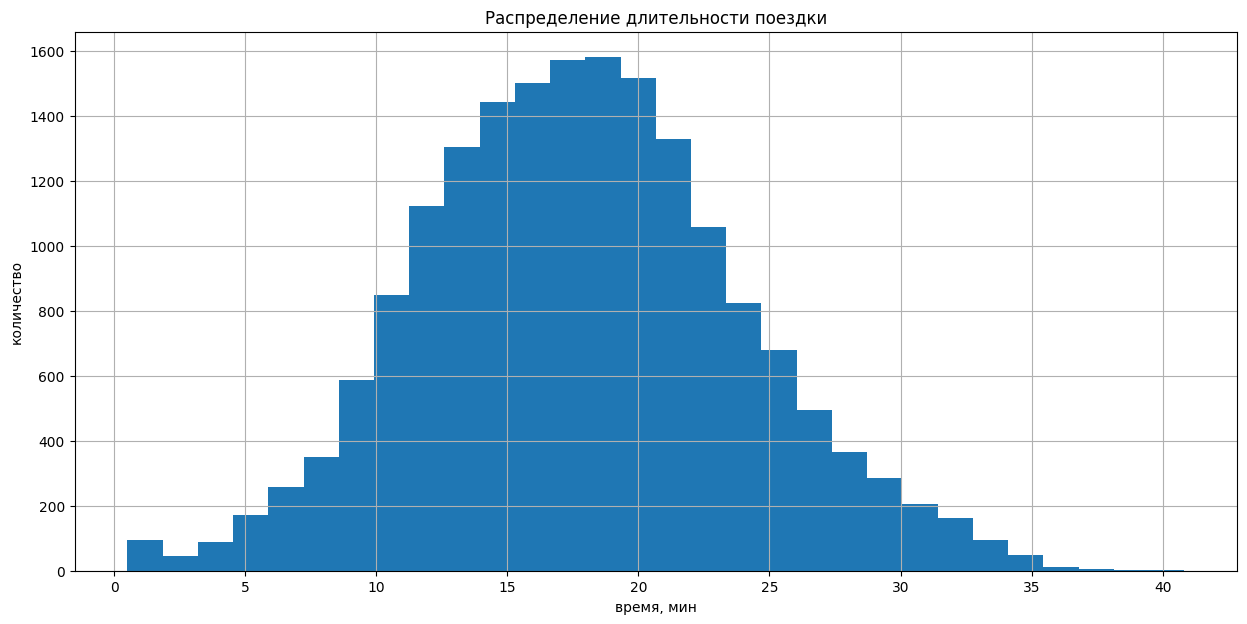

In [22]:
rides['duration'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение длительности поездки')
plt.xlabel('время, мин')
plt.ylabel('количество');

In [23]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

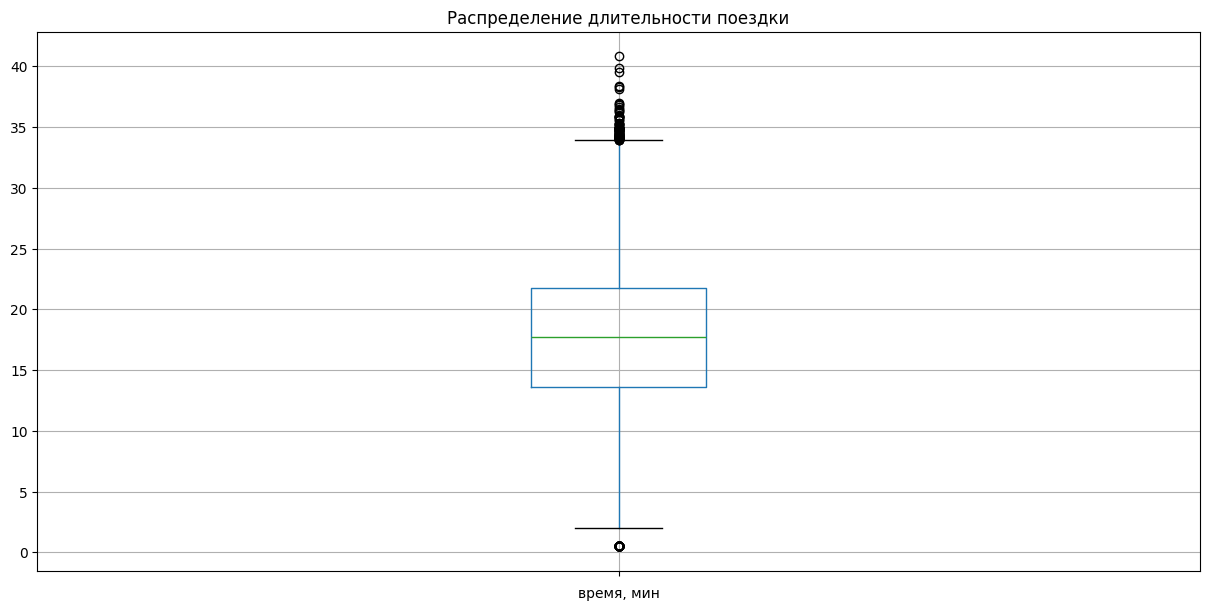

In [24]:
rides.boxplot(column = 'duration', figsize =(15,7) )
plt.title('Распределение длительности поездки')
plt.xlabel('время, мин')
plt.xticks([1], ['']);

В основном пользователи ездят на самокате от 10 до 25 минут. В среднем около 18 минут

<a id="объед"></a>
## Объединение данных

Глянем на размеры датасетов перед объединением. 1534 пользователей, 18068 поездок осуществлено. Сначала объединим по user_id. К таблице rides присоединяем таблицу users. Должно получиться 18068 строк о поездках, каждый user_id мог много раз прокатиться. Итого должно получиться 9 столбцов, так как объединение по user_id. Далее присоединим таблицу с подписками по subscription_type

In [25]:
print('размерность датасета пользователей:', users.shape)
print('размерность датасета о поездках:', rides.shape)
print('размерность датасета о подписках:', subscriptions.shape)

размерность датасета пользователей: (1534, 5)
размерность датасета о поездках: (18068, 5)
размерность датасета о подписках: (2, 4)


In [26]:
user_rides = rides.merge(users, on = 'user_id', how = 'inner')
user_rides.shape

(18068, 9)

In [27]:
df_all = user_rides.merge(subscriptions, on= 'subscription_type')
df_all.shape

(18068, 12)

In [28]:
df_all.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Проверяем на пропуски. Их нет, всё присоединилось без проблем
</div>

In [29]:
df_free = df_all[df_all['subscription_type'] == 'free']
df_free

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [30]:
df_ultra = df_all[df_all['subscription_type'] == 'ultra']
df_ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


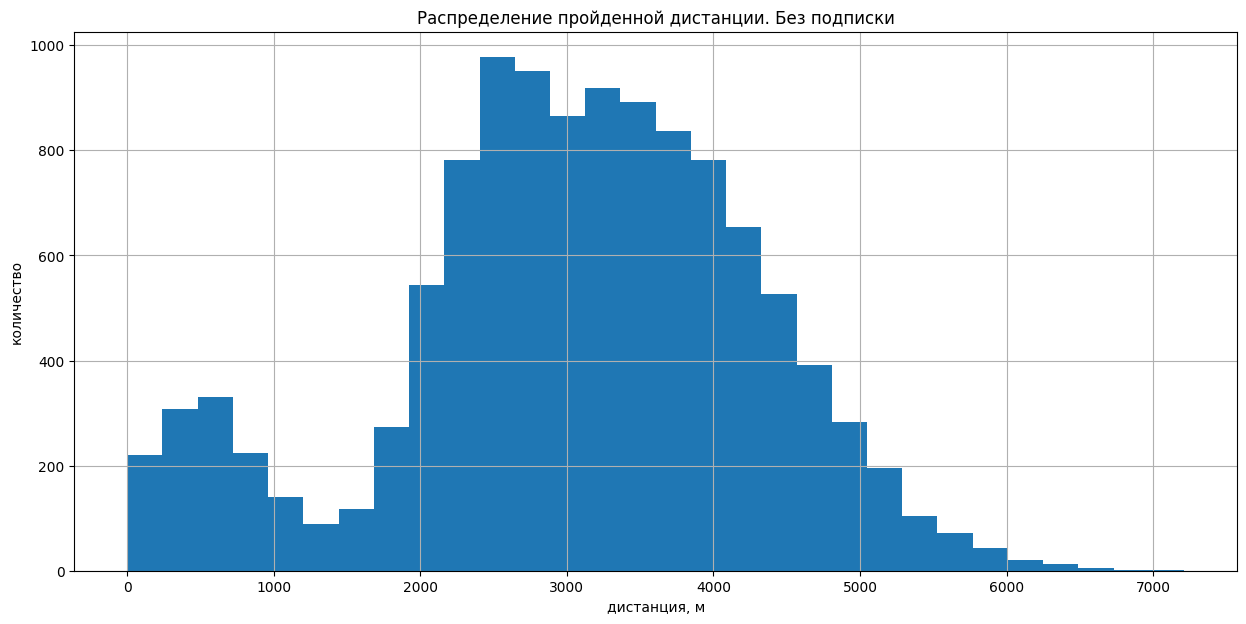

In [31]:
df_free['distance'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение пройденной дистанции. Без подписки')
plt.xlabel('дистанция, м')
plt.ylabel('количество');

In [32]:
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

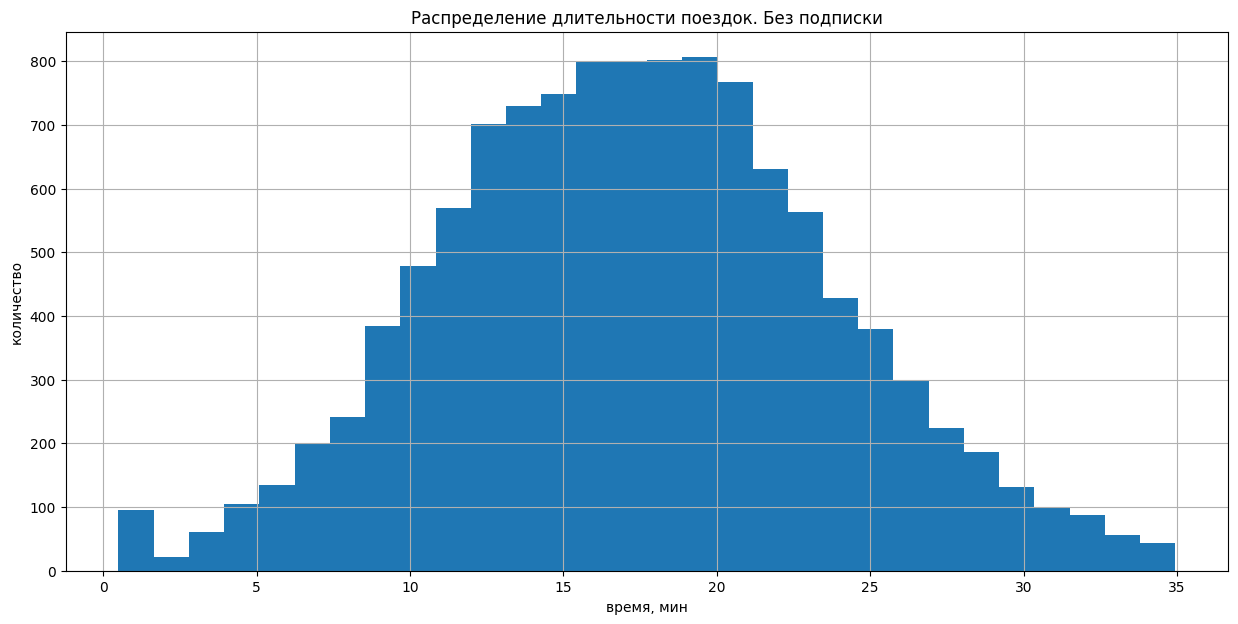

In [33]:
df_free['duration'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение длительности поездок. Без подписки')
plt.xlabel('время, мин')
plt.ylabel('количество');

In [34]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Построили графики распределения для клиентов без подписки. Ниже для клиентов с подпиской

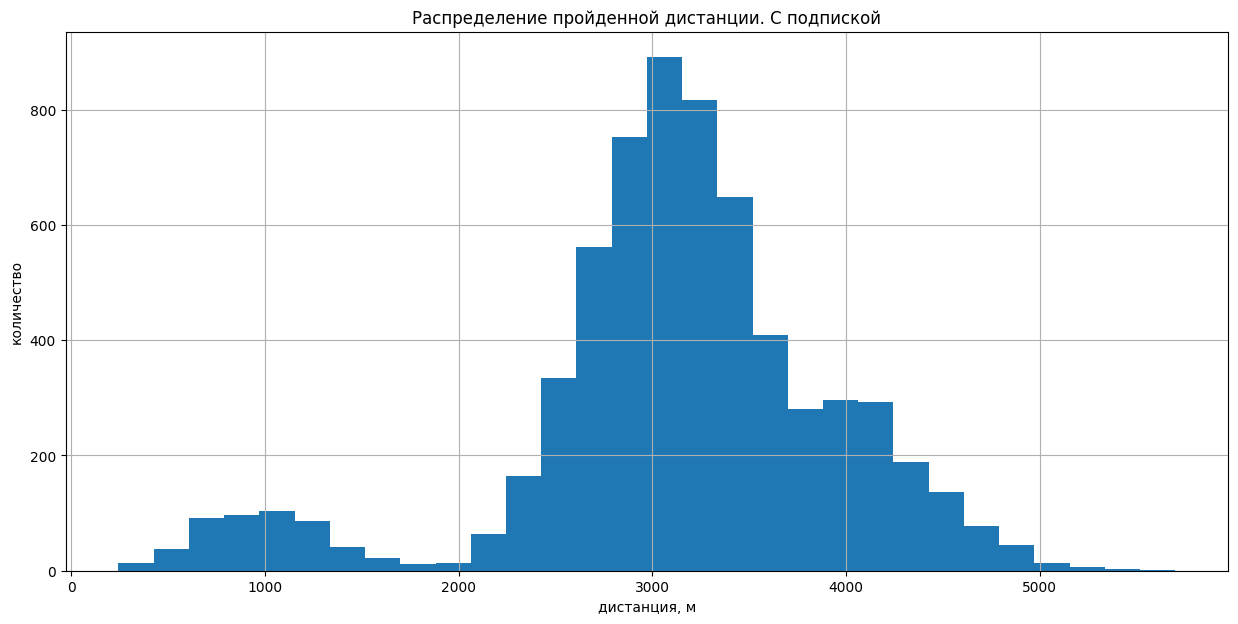

In [35]:
df_ultra['distance'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение пройденной дистанции. С подпиской')
plt.xlabel('дистанция, м')
plt.ylabel('количество');

In [36]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

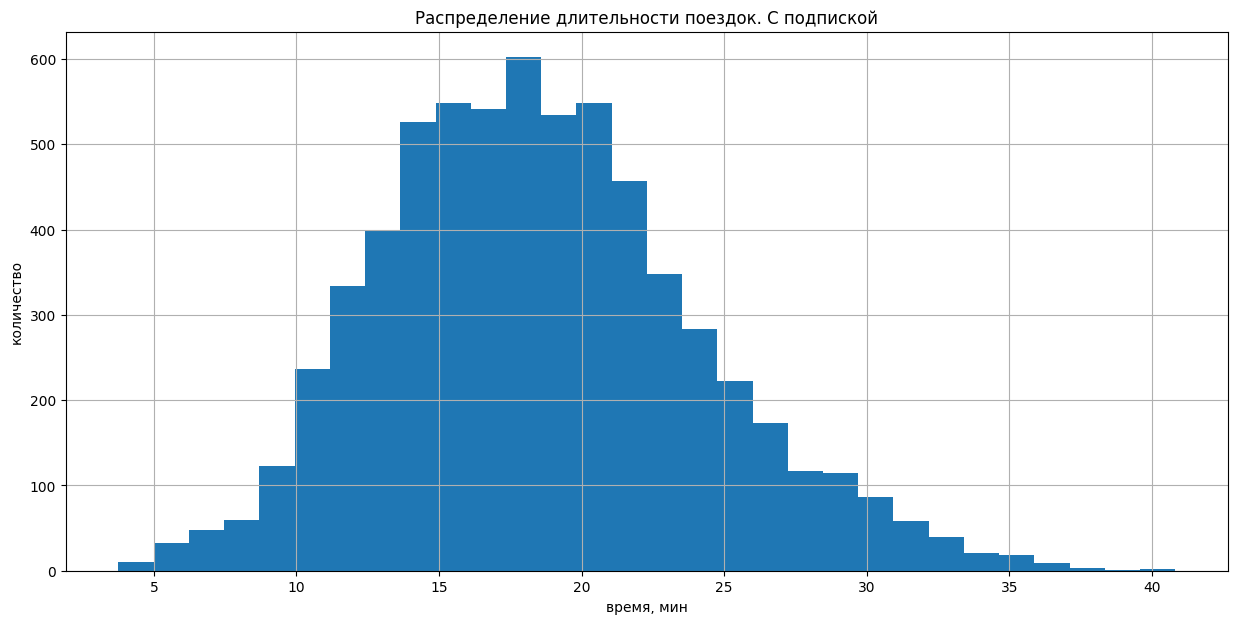

In [37]:
df_ultra['duration'].hist(bins = 30, figsize =(15,7))
plt.title('Распределение длительности поездок. С подпиской')
plt.xlabel('время, мин')
plt.ylabel('количество');

In [38]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

**Вывод:**
1) Клиентов без подписки и с подпиской примерно одинаково (54% на 46%), а вот разница в количестве поездок - 64% на 36%  
2) Средняя и медианная дистанция у клиентов с подпиской чуть больше, чем у клиентов без подписки  
3) Среднее и медианное время пользования самокатом у клиентов с подпиской тоже выше, чем у клиентов без подписки

<a id="выручка"></a>
##  Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из прошлого шага: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [39]:
df_user_month = df_all.groupby(['user_id', 'month']).agg({'distance' : 'sum', 'duration' : 'sum', 'name' : 'count'}).reset_index()
df_user_month.columns = ['user_id', 'month', 'distance_sum', 'duration_sum', 'count']
df_user_month

,user_id,month,distance_sum,duration_sum,count
0,1,1,7027.511294,41.416640,2
1,1,4,754.159807,6.232113,1
2,1,8,6723.470560,44.776802,2
3,1,10,5809.911100,31.578017,2
4,1,11,7003.499363,53.397424,3
...,...,...,...,...,...
11326,1534,6,3409.468534,24.812678,2
11327,1534,8,7622.453034,47.205960,2
11328,1534,9,4928.173852,22.560373,1
11329,1534,11,13350.015305,76.342174,4


Для начала проверим, у всех ли user_id всегда один subscription_type, или же кто-то в период анализ поменял подписку. Видим, что у всех 1 subscription_type. Это нужно для дальнейших подсчетов

In [40]:
df_all.groupby('user_id')['subscription_type'].nunique().reset_index().sort_values(by = 'subscription_type')

,user_id,subscription_type
0,1,1
1027,1028,1
1026,1027,1
1025,1026,1
1024,1025,1
...,...,...
507,508,1
506,507,1
505,506,1
514,515,1


посчитаем оплату за каждую поездку

In [41]:
df_all['one_ride_price'] = df_all['start_ride_price'] + (np.ceil(df_all['duration']) * df_all['minute_price'])
df_all.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,one_ride_price
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199,156.0
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199,96.0
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199,42.0
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199,114.0
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199,162.0


подсчитаем, сколько платил каждый пользователь за поездки на самокате в месяц ***без учета подписки***

In [42]:
df_user_month = df_all.groupby(['user_id', 'month', 'subscription_type']).agg({'distance' : 'sum', 'duration' : 'sum', 'name' : 'count', 'one_ride_price' : 'sum'}).reset_index()
df_user_month.columns = ['user_id', 'month', 'subscription_type', 'distance_sum', 'duration_sum', 'count', 'month_price']
df_user_month

,user_id,month,subscription_type,distance_sum,duration_sum,count,month_price
0,1,1,ultra,7027.511294,41.416640,2,252.0
1,1,4,ultra,754.159807,6.232113,1,42.0
2,1,8,ultra,6723.470560,44.776802,2,276.0
3,1,10,ultra,5809.911100,31.578017,2,192.0
4,1,11,ultra,7003.499363,53.397424,3,336.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,24.812678,2,308.0
11327,1534,8,free,7622.453034,47.205960,2,484.0
11328,1534,9,free,4928.173852,22.560373,1,234.0
11329,1534,11,free,13350.015305,76.342174,4,824.0


Теперь мы добавили в столбец с помесячной выручкой цену подписки за 1 месяц (199 рублей) для каждого ultra пользователя

In [43]:
df_user_month.loc[df_user_month['subscription_type'] == 'ultra', 'month_price'] += 199
df_user_month = df_user_month.rename(columns = {'month_price' : 'monthly_revenue'})
df_user_month

,user_id,month,subscription_type,distance_sum,duration_sum,count,monthly_revenue
0,1,1,ultra,7027.511294,41.416640,2,451.0
1,1,4,ultra,754.159807,6.232113,1,241.0
2,1,8,ultra,6723.470560,44.776802,2,475.0
3,1,10,ultra,5809.911100,31.578017,2,391.0
4,1,11,ultra,7003.499363,53.397424,3,535.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,24.812678,2,308.0
11327,1534,8,free,7622.453034,47.205960,2,484.0
11328,1534,9,free,4928.173852,22.560373,1,234.0
11329,1534,11,free,13350.015305,76.342174,4,824.0


**Выводы по разделу:**  
Посчитали выручку по каждому пользователю за каждый месяц, включая 2 типа подписки - ultra и free

<a id="гипотезы"></a>
## Проверка гипотез

**1) Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки**

In [44]:
df_all.groupby('subscription_type')['duration'].mean()

subscription_type
free     17.390909
ultra    18.541985
Name: duration, dtype: float64

Мы видим, что в среднем длительность поездок с подпиской и без отличается. Причем больше чем на минуту. Является ли это значимым результатом? Сформулируем нулевую гипотезу:

**Нулевая гипотеза:** нет разницы между двумя группами пользователей приложения (с подпиской и без) по длительности поездки  
**Альтернативная гипотеза:** длительность поездки у пользователей с подпиской больше, чем у пользователей без подписки. Применим односторонний t-test, применив alternative='greater'

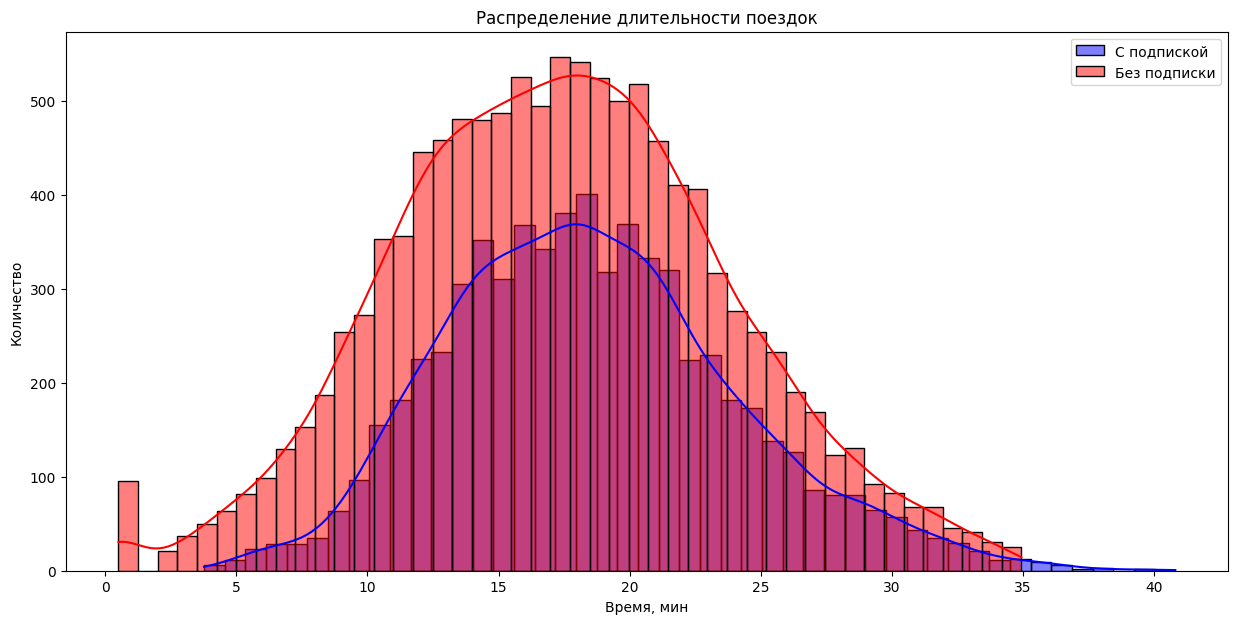

In [45]:
ultra = df_all[df_all['subscription_type'] == 'ultra']['duration']
free = df_all[df_all['subscription_type'] == 'free']['duration']

plt.figure(figsize=(15,7))
sns.histplot(ultra, kde=True, label='С подпиской', color='blue')
sns.histplot(free, kde=True, label='Без подписки', color='red')
plt.legend()
plt.title('Распределение длительности поездок')
plt.xlabel('Время, мин')
plt.ylabel('Количество');

In [46]:
print(st.ttest_ind(ultra, free, alternative='greater'))
results = st.ttest_ind(ultra, free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

TtestResult(statistic=12.241203729044017, pvalue=1.2804098316645618e-34, df=18066.0)
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Для проверки мы использовали односторонний t-тест. И сравнили две группы. По результатам проверки p-value сильно меньше 0.05, значит мы отвергаем нулевую гипотезу. Разница между двумя группа существенная. **Есть статистические основания утверждать, что длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки**

**2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы**

In [53]:
ultra_dis = df_all[df_all['subscription_type'] == 'ultra']['distance']
print('среднее расстояние:', df_all[df_all['subscription_type'] == 'ultra']['distance'].mean())

среднее расстояние: 3115.4453880370247


Сфомулируем гипотезы для проверки\
**Нулевая гипотеза:** среднее расстояние одной поездки равно 3130 метров   
**Альтернативная гипотеза:** среднее расстояние больше 3130 метров

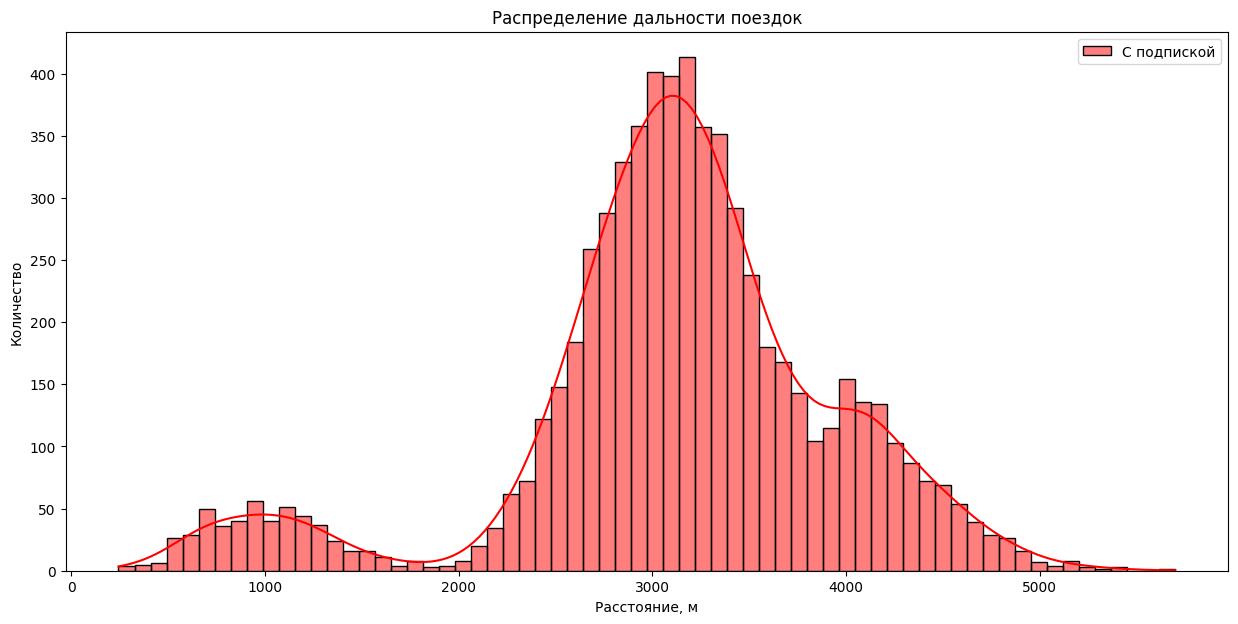

In [49]:
plt.figure(figsize=(15,7))
sns.histplot(ultra_dis, kde=True, label='C подпиской', color='red')
plt.legend()
plt.title('Распределение дальности поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество');

In [56]:
results = st.ttest_1samp(ultra_dis, 3130, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Мы проверяем только правостороннюю часть (greater) графика. И тут у нас p-value сильно больше 0.05, а значит и отвергнуть нулевую гипотезу мы не можем. **Нет статистических оснований утверждать, что среднее расстояние одной поездки больше 3130 м**

**3) Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод**

**Нулевая гипотеза:** помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки  
**Альтернативная гипотеза:** помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Берем столбец monthly_revenue из df_user_month и сравниваем

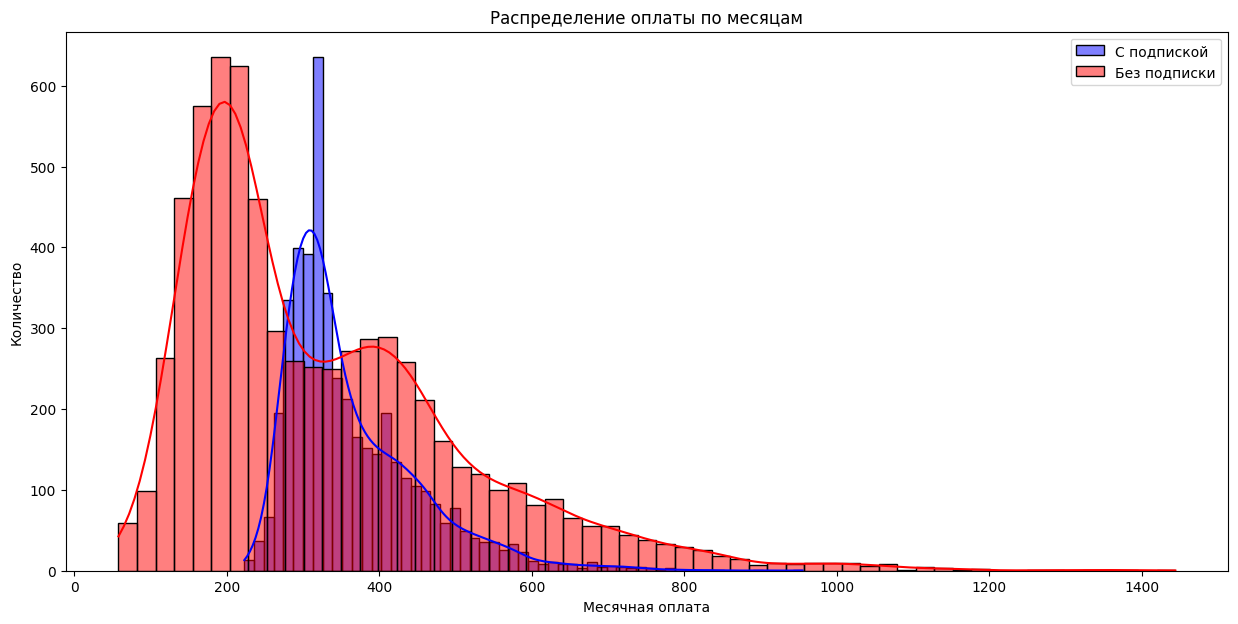

In [59]:
ultra_revenue = df_user_month[df_user_month['subscription_type'] == 'ultra']['monthly_revenue']
free_revenue = df_user_month[df_user_month['subscription_type'] == 'free']['monthly_revenue']

plt.figure(figsize=(15,7))
sns.histplot(ultra_revenue, kde=True, label='С подпиской', color='blue')
sns.histplot(free_revenue, kde=True, label='Без подписки', color='red')
plt.legend()
plt.title('Распределение оплаты по месяцам')
plt.xlabel('Месячная оплата')
plt.ylabel('Количество');

In [60]:
print(st.ttest_ind(ultra_revenue, free_revenue,alternative = 'greater'))
results = st.ttest_ind(ultra_revenue, free_revenue, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

TtestResult(statistic=11.64246602360774, pvalue=1.8850394384715216e-31, df=11329.0)
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


С уверенностью отвергаем нулевую гипотезу. **Есть статистические основания утверждать, что в результате проведенного одностороннего t-test'а помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

**4) Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Нулевая гипотеза:** количество обращений до и после обновления не изменилось  
**Альтернативная гипотеза:** количество обращений после обновления снизилось
Для проверки нам понадобится левосторонний t-test для зависимых выборок, так как у нас один и те же пользователи в двух разных периодах


<a id="вывод"></a>
## Вывод

По результатам анализа популярного сервиса аренды самокатов GoFast была проведена следующая работа:
1) Открыты 3 датасета - информация о пользователях (1565 строк), информация об их поездках (более 18 тысяч) и данные по условиям подписки
2) Проверка на наличие пропусков в датасетах (их нет) и дубликатов (удалены). Приведение столбцов к логичным форматам
3) Был проведен исследовательский анализ данных:
    - анализ частоты встречаемости городов: на первом месте Пятигорск, на последнем Москва. Но разница между 8 городами, где пользуются самокатами GoFast не существенная
    - соотношение пользователей без подписки и с подпиской (54% на 46% соответственно)
    - возраст пользователей: в среднем возраст пользователей около 25 лет, а большая часть из них в диапазоне от 20 до 30 лет
    - расстояние, которое пользователь преодолел за одну поездку: в среднем примерно 3100 метров. А большая часть поездок лежит в диапазоне от 2500 до 3800 метров
    - продолжительность поездок: в среднем это 18 минут. Большинство поездок это от 10 до 25 минут
4) Объединили данные в один датасет. И сравнили данные по длительности и дальности поездок для пользователей с подпиской и без:
    - дальность поездок: средняя и медианная дистанция у клиентов с подпиской чуть больше, чем у клиентов без подписки (среднее 3115 против 3045 метров)
    - длительность поездок: Среднее и медианное время пользования самокатом у клиентов с подпиской тоже выше, чем у клиентов без подписки (18.54 против 17.39)
5) Создали столбец с выручкой от каждого пользователя за каждый месяц. Необходимо для дальнейшей проверки гипотез
6) Проверили 3 гипотезы:
    - Тратят ли пользователи с подпиской больше времени на поездки? Есть статистические основания утверждать, что длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки
    - Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Нет статистических оснований утверждать, что среднее расстояние одной поездки больше 3130 м
    - Является ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Можем утверждать, что в результате проведенного теста помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки